# 图形化展示数据

以图形方式表示数据对于了解数据的行为方式以及查看潜在的结构或缺陷非常有用。应该注意的是，因为人类非常擅长看到能证实我们观点的证据，并且视觉数据很好地适应了这一点。构建猜想时绘图很好用，但不应该用于测试假设。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
from tiingo import TiingoClient

config = {}
config['session'] = True
config['api_key'] = os.environ['TIINGO_API_KEY']

client = TiingoClient(config)

def get_df_from_tiingo(symbol, start, end):
    df = pd.DataFrame(client.get_ticker_price(symbol,
                      startDate=start,
                      endDate=end,
                      frequency='daily'
                     ))
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize('UTC')
    del df.index.name
    return df

## 获取一些数据

我们需要一些数据用来绘制。这里我们以 AAPL 和 MSFT 的价格数据为例。

## 数据结构

了解数据的结构非常重要。通常情况下，你需要做大量的工作，将你的数据转换成你需要测试的表单。

本例中，返回数据的格式为 pandas 的 DataFrame 对象。行是时间戳，列是两个资产 AAPL 和 MSFT。

In [3]:
start = '2014-01-01'
end = '2015-01-01'
symbols = ['AAPL', 'MSFT']

data = pd.concat(
    [
        get_df_from_tiingo(symbol, start, end).loc[:, 'close'] for symbol in symbols
    ],
    axis=1,
    keys=symbols
)
data.head()

,AAPL,MSFT
2014-01-02 00:00:00+00:00,553.1300,37.16
2014-01-03 00:00:00+00:00,540.9800,36.91
2014-01-06 00:00:00+00:00,543.9300,36.13
2014-01-07 00:00:00+00:00,540.0375,36.41
2014-01-08 00:00:00+00:00,543.4600,35.76


In [4]:
# AAPL 2014 拆股
filtered_index = data['AAPL'] > data['AAPL'].mean()
data['AAPL'].loc[filtered_index] = data['AAPL'].loc[filtered_index] / 7

现在我们可以检索数据。在二维 DataFrame 中检索会得到一维的 Series 对象。Series 的索引是时间戳，其中的值是一个价格。

In [5]:
data['AAPL'].head()

2014-01-02 00:00:00+00:00    79.018571
2014-01-03 00:00:00+00:00    77.282857
2014-01-06 00:00:00+00:00    77.704286
2014-01-07 00:00:00+00:00    77.148214
2014-01-08 00:00:00+00:00    77.637143
Name: AAPL, dtype: float64

## 直方图

直方图能够可视化数据不同值的频率。通过使用条柱显示频率分布，我们能够快速查看大多数观察值聚集的位置。

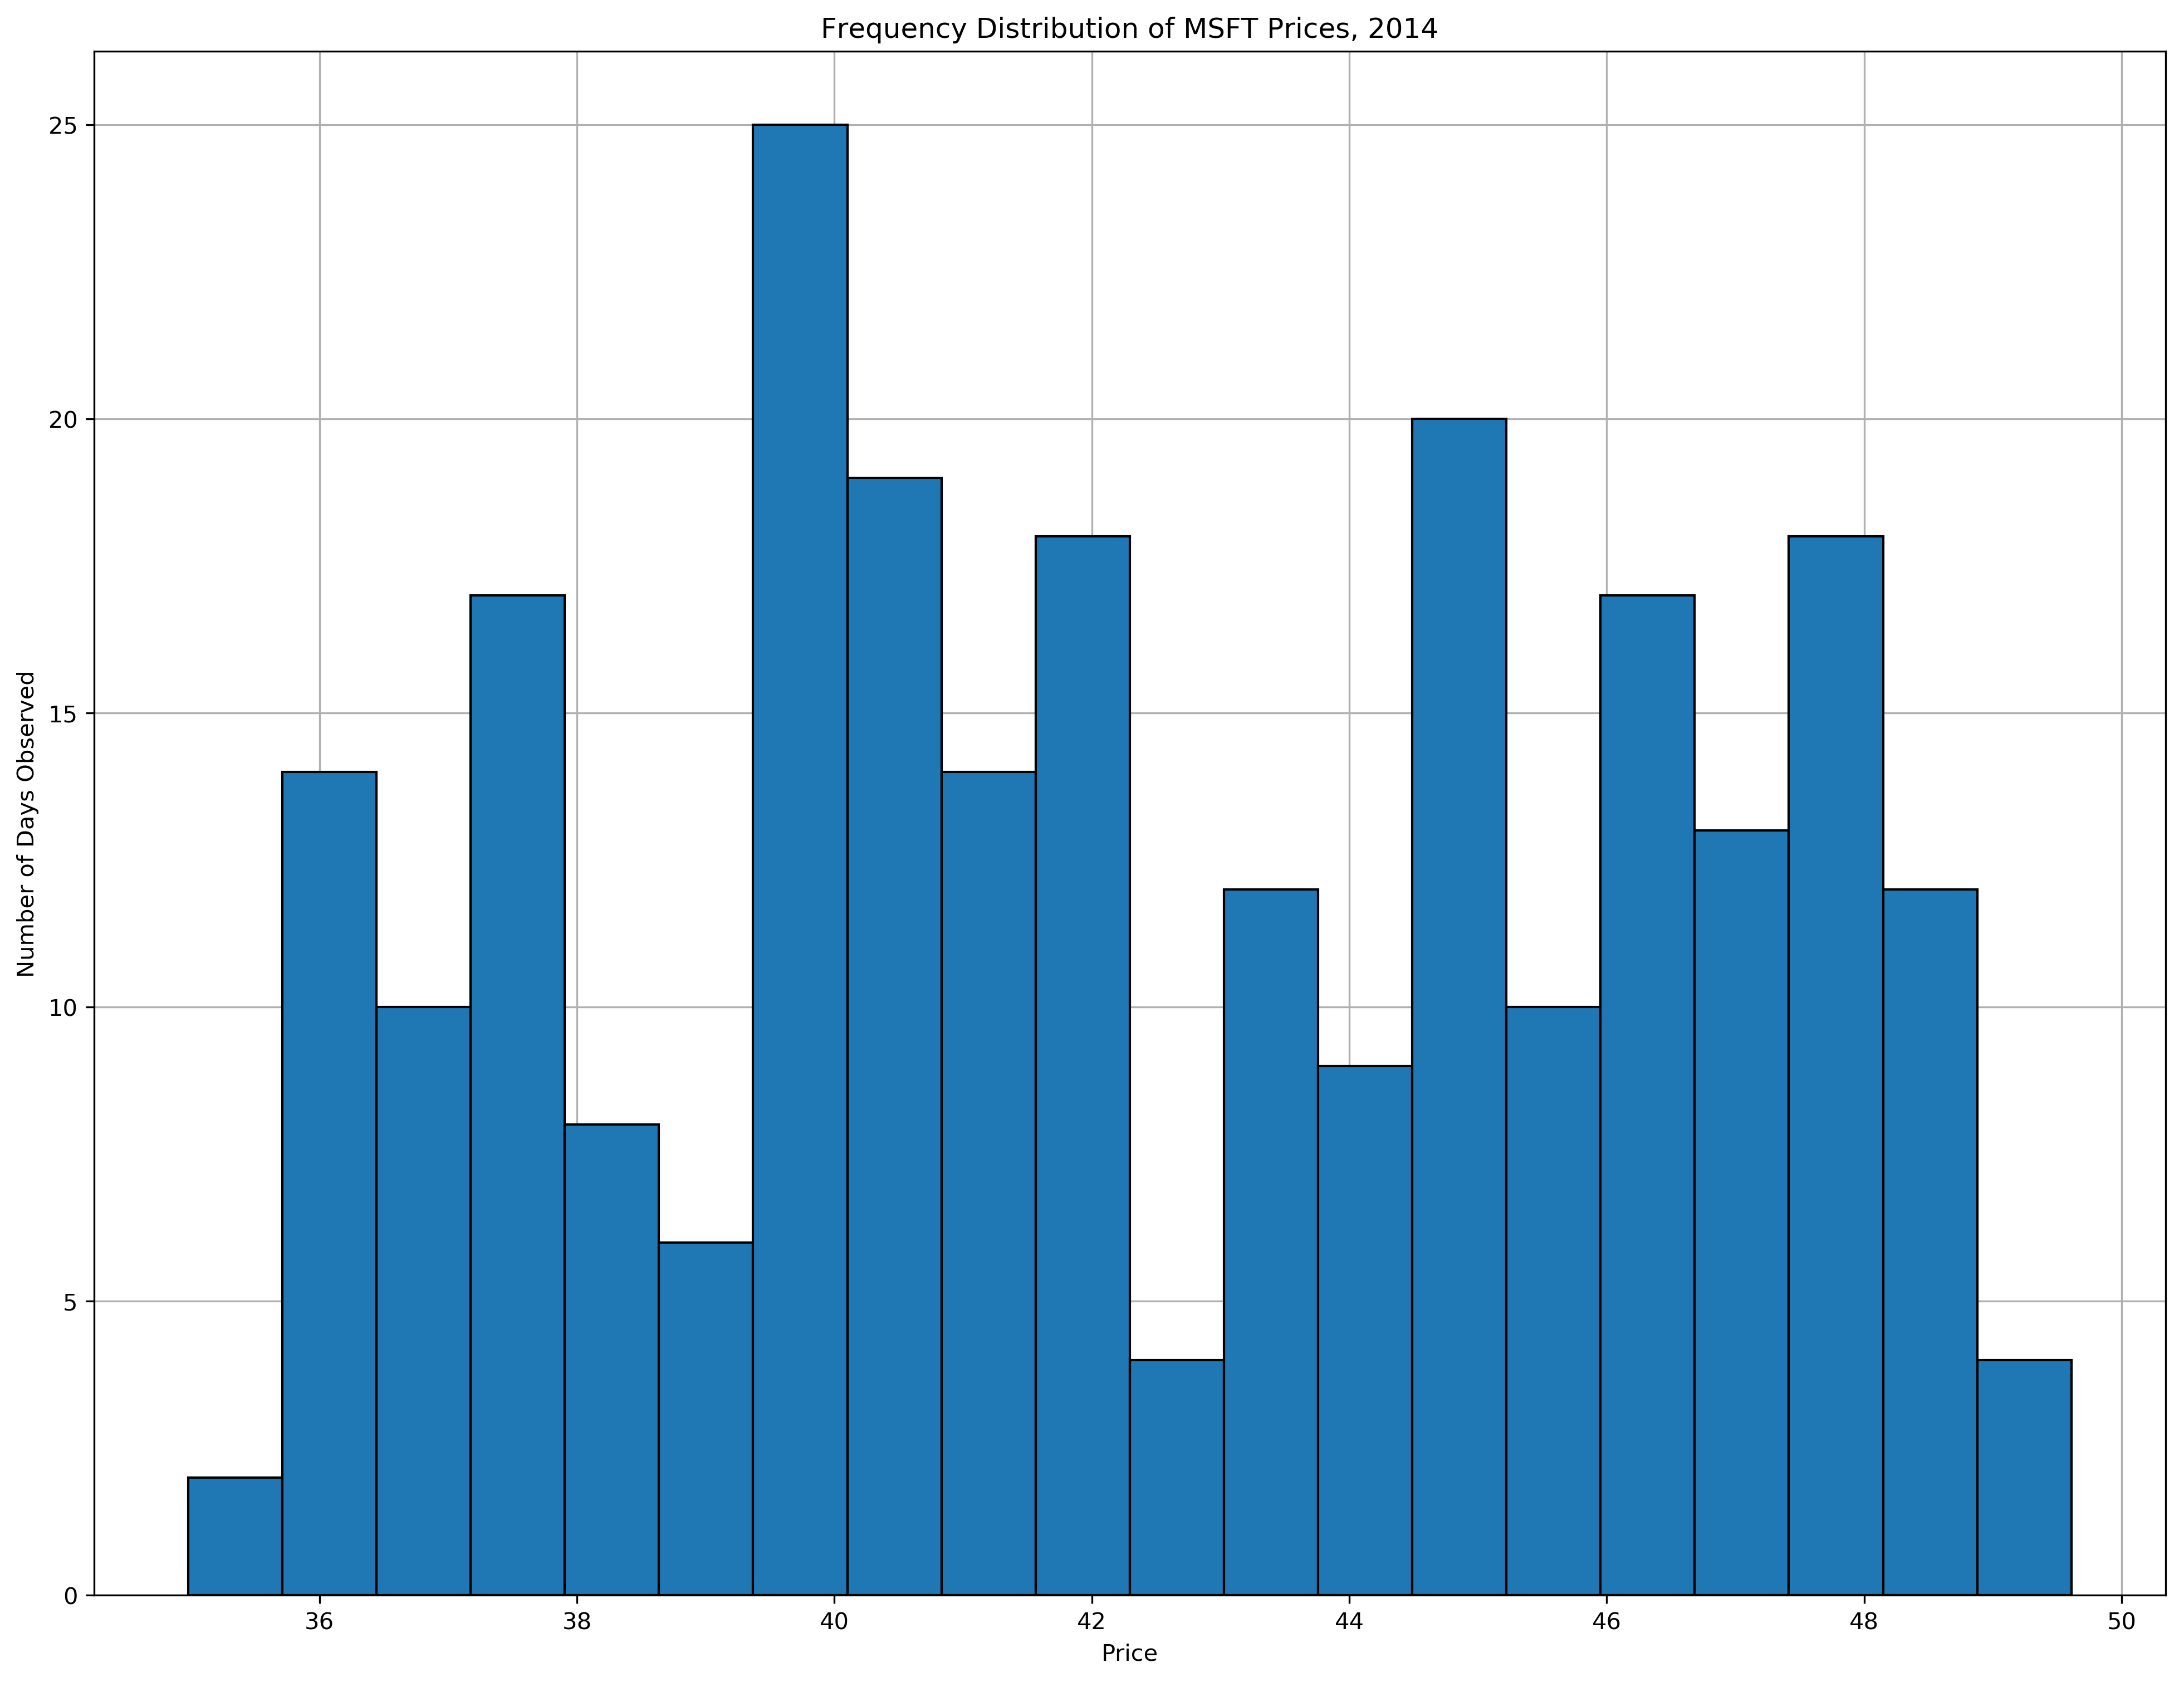

In [6]:
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### 收益率直方图

在金融领域，我们很少会看价格的分布，其原因在于价格不稳定而且变动很大。因此我们会用每日回报率。

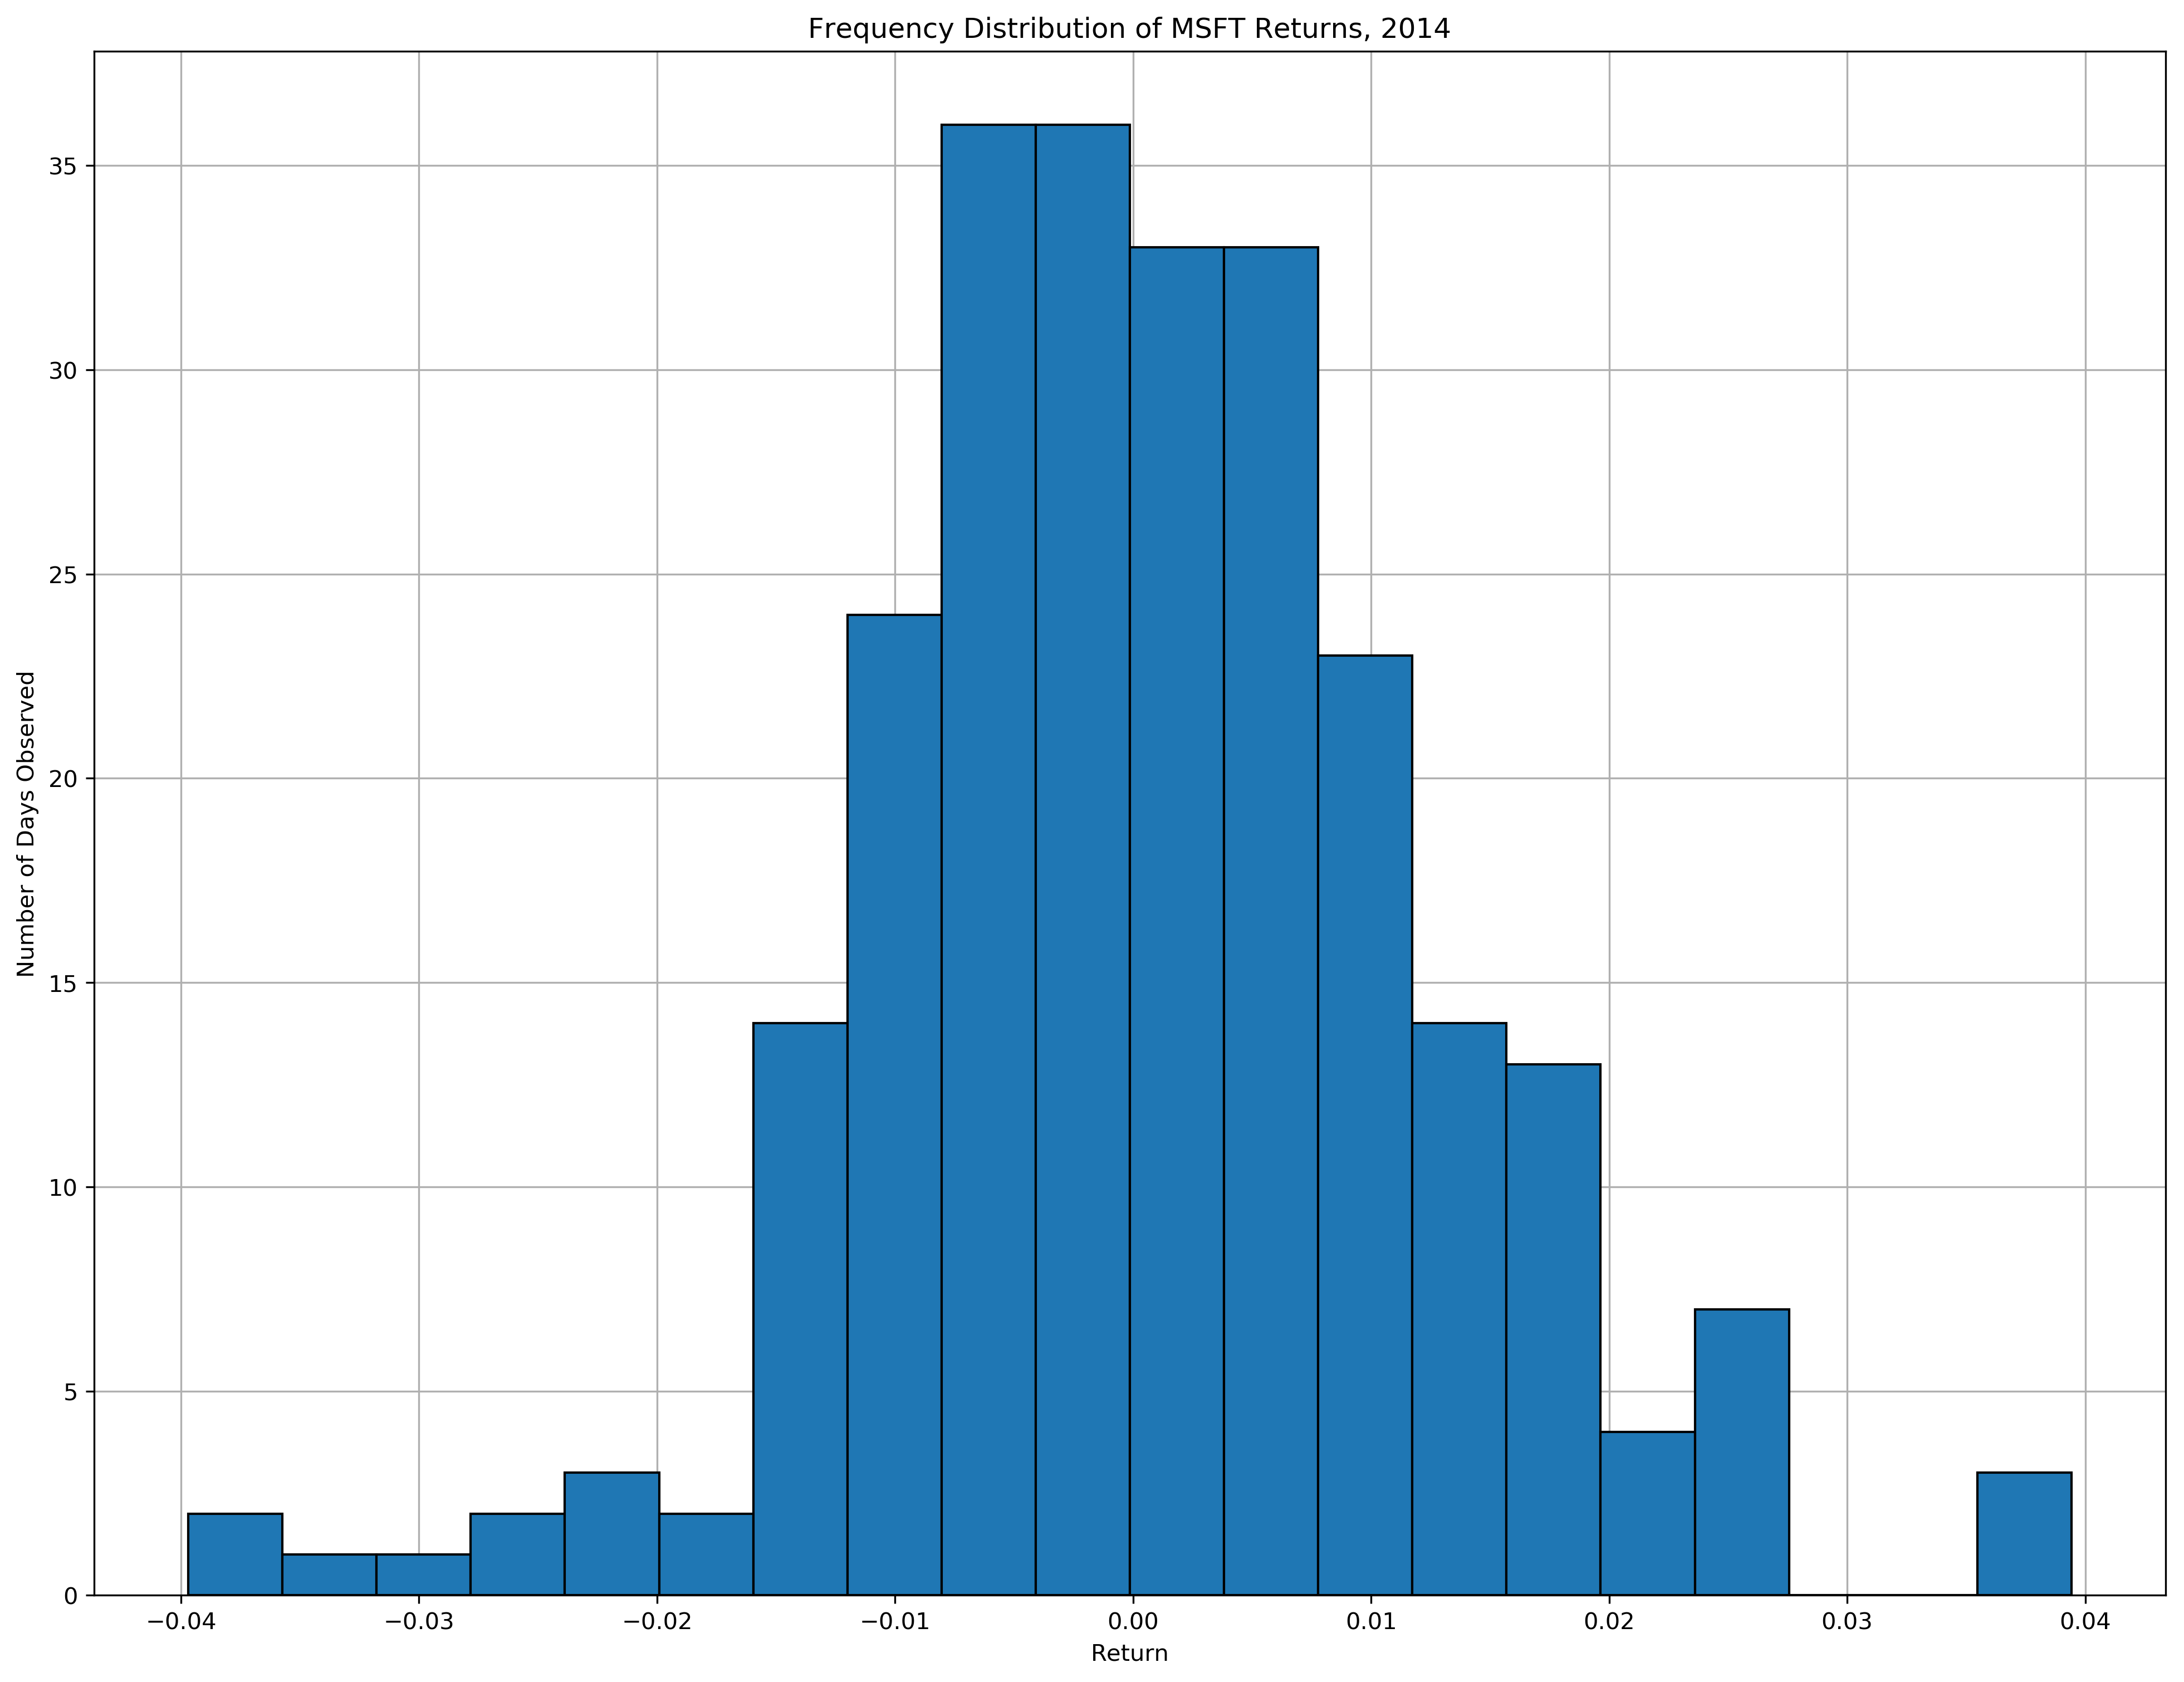

In [7]:
# 移除首个元素，因为其变动的百分比不存在
R = data['MSFT'].pct_change()[1:]

plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

如图所示，在 2014 年，MSFT 的日回报率超过 0.03 的不到 5 天。

### 累积直方图（离散估计CDF）

另一种显示数据的方式是使用累计分布函数，其中条的高度表示位于该栏中或前一栏中的观察值的数量。由于不能有负数的观测值，因此该图不会减少。图形的选择取决于你感兴趣的信息。

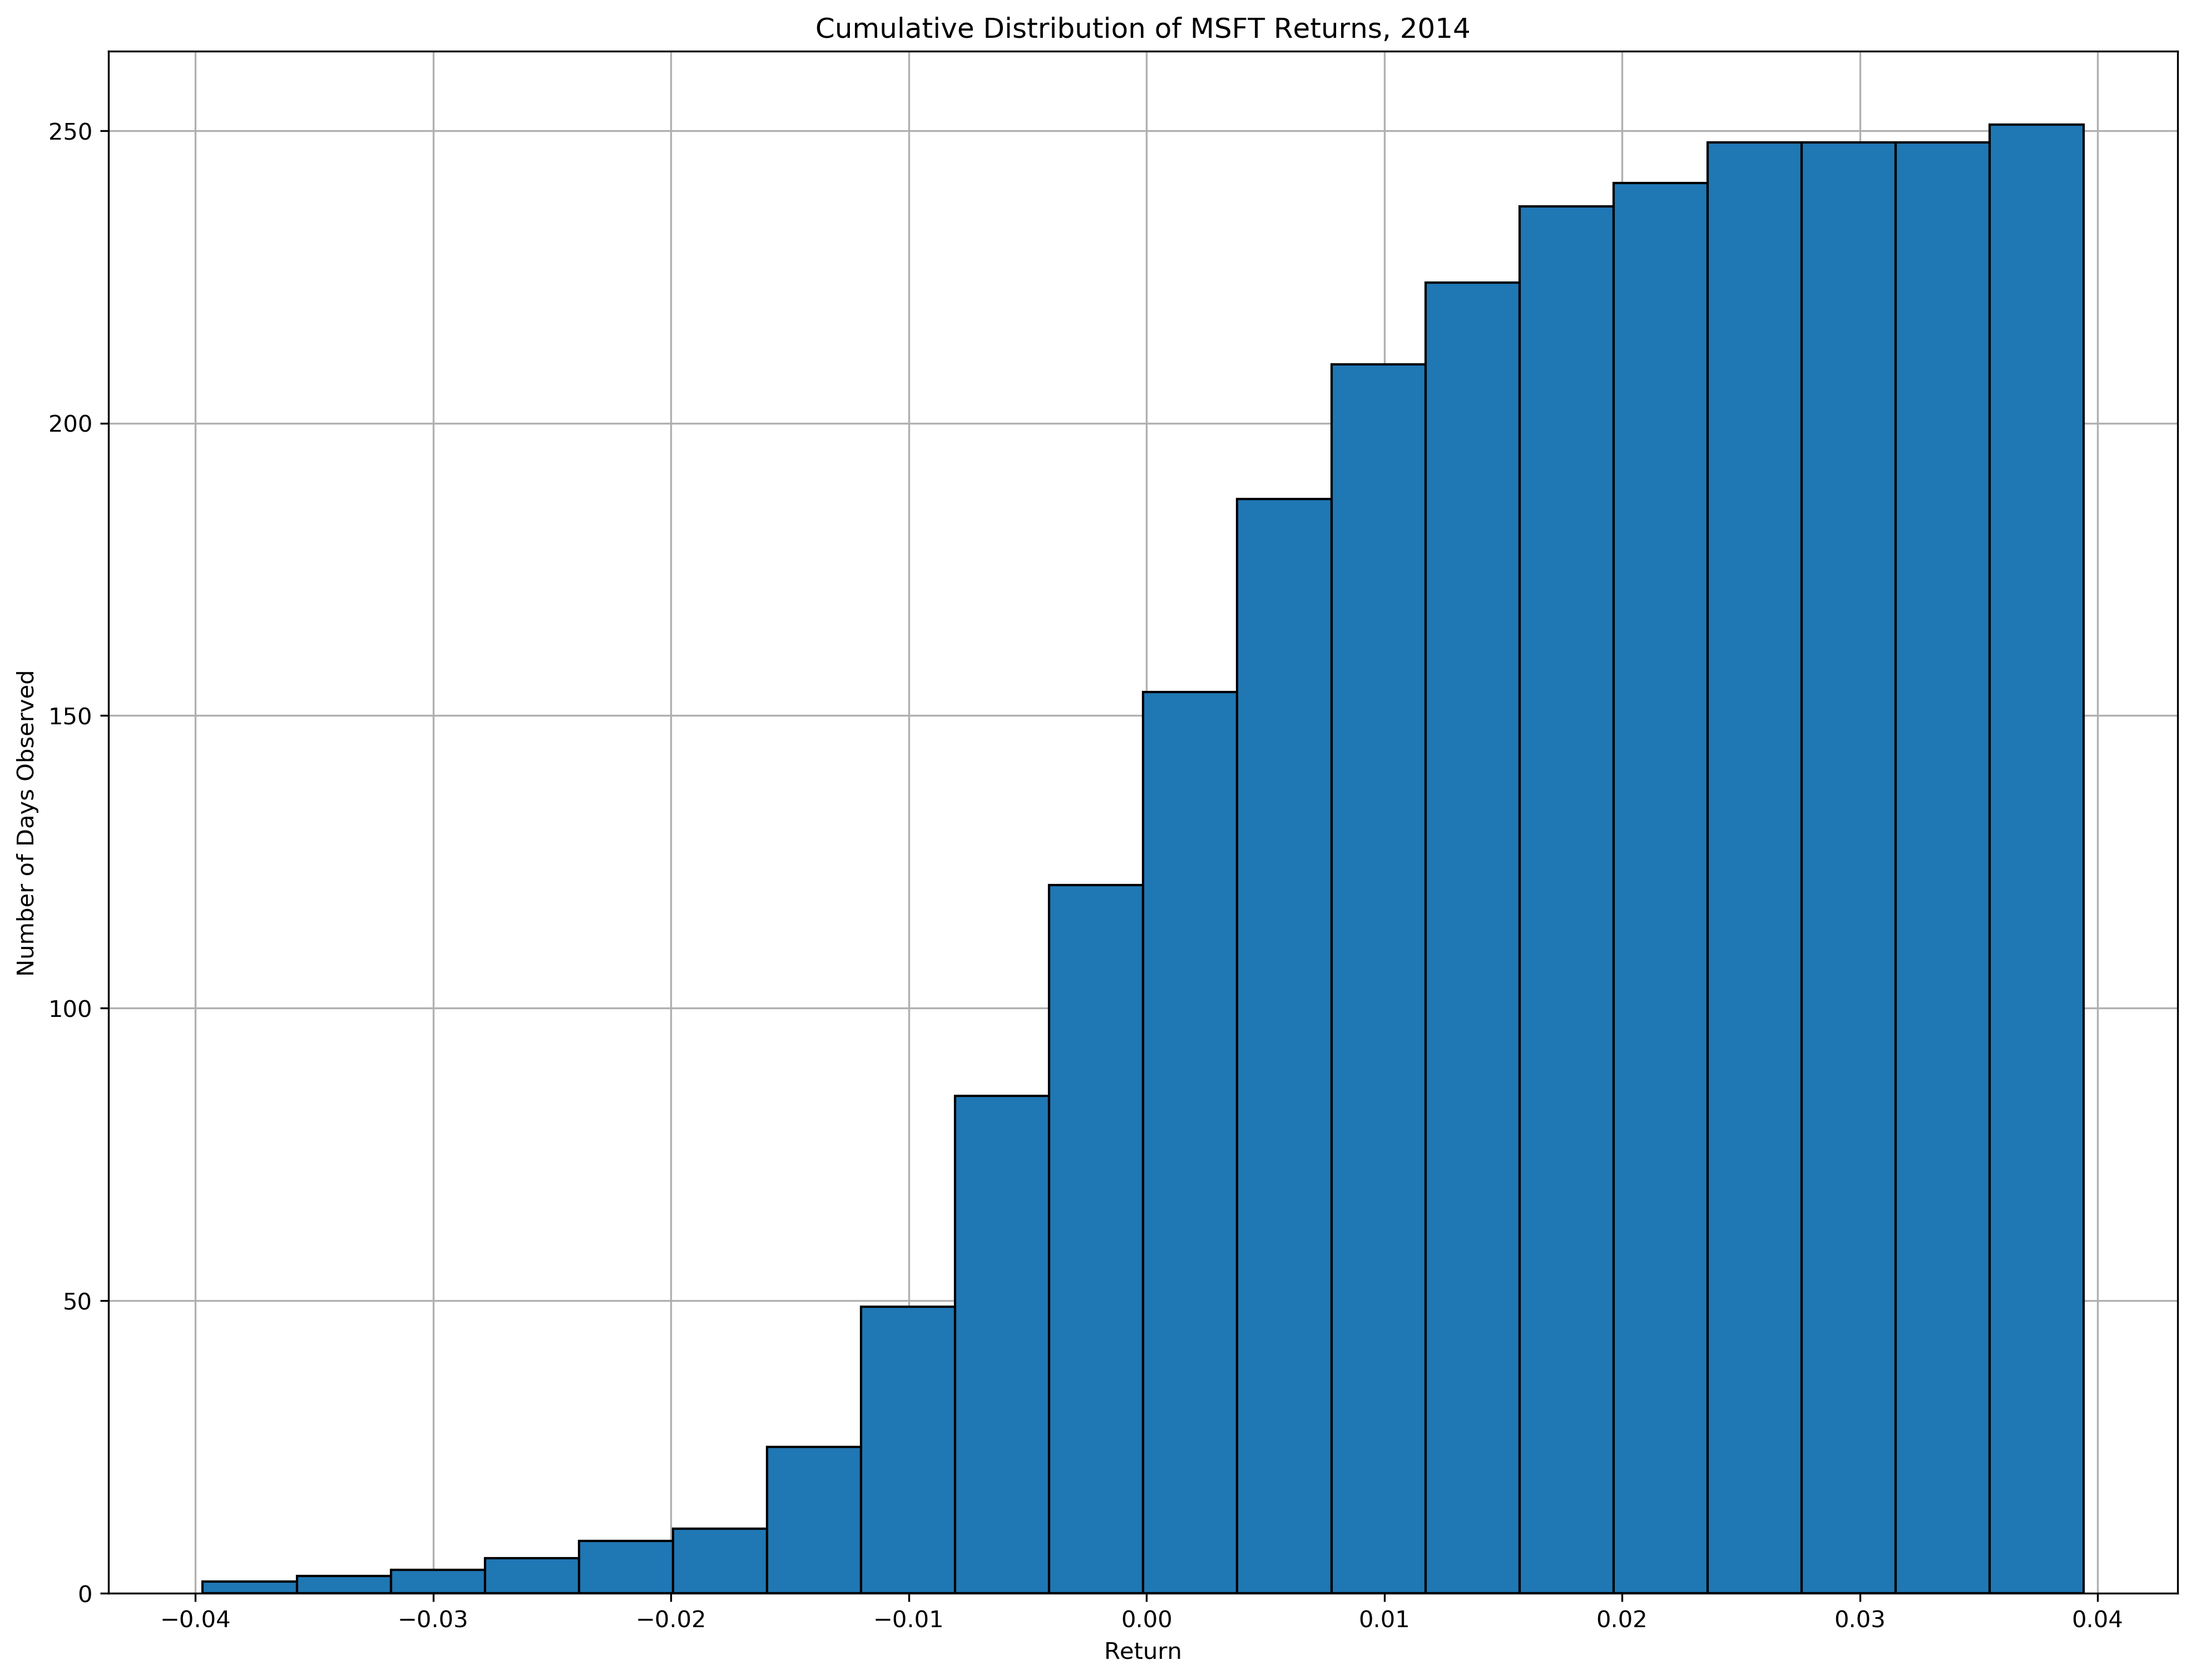

In [8]:
R = data['MSFT'].pct_change()[1:]

plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

## 散点图

散点图对于可视化两个数据集之间的关系很有用。

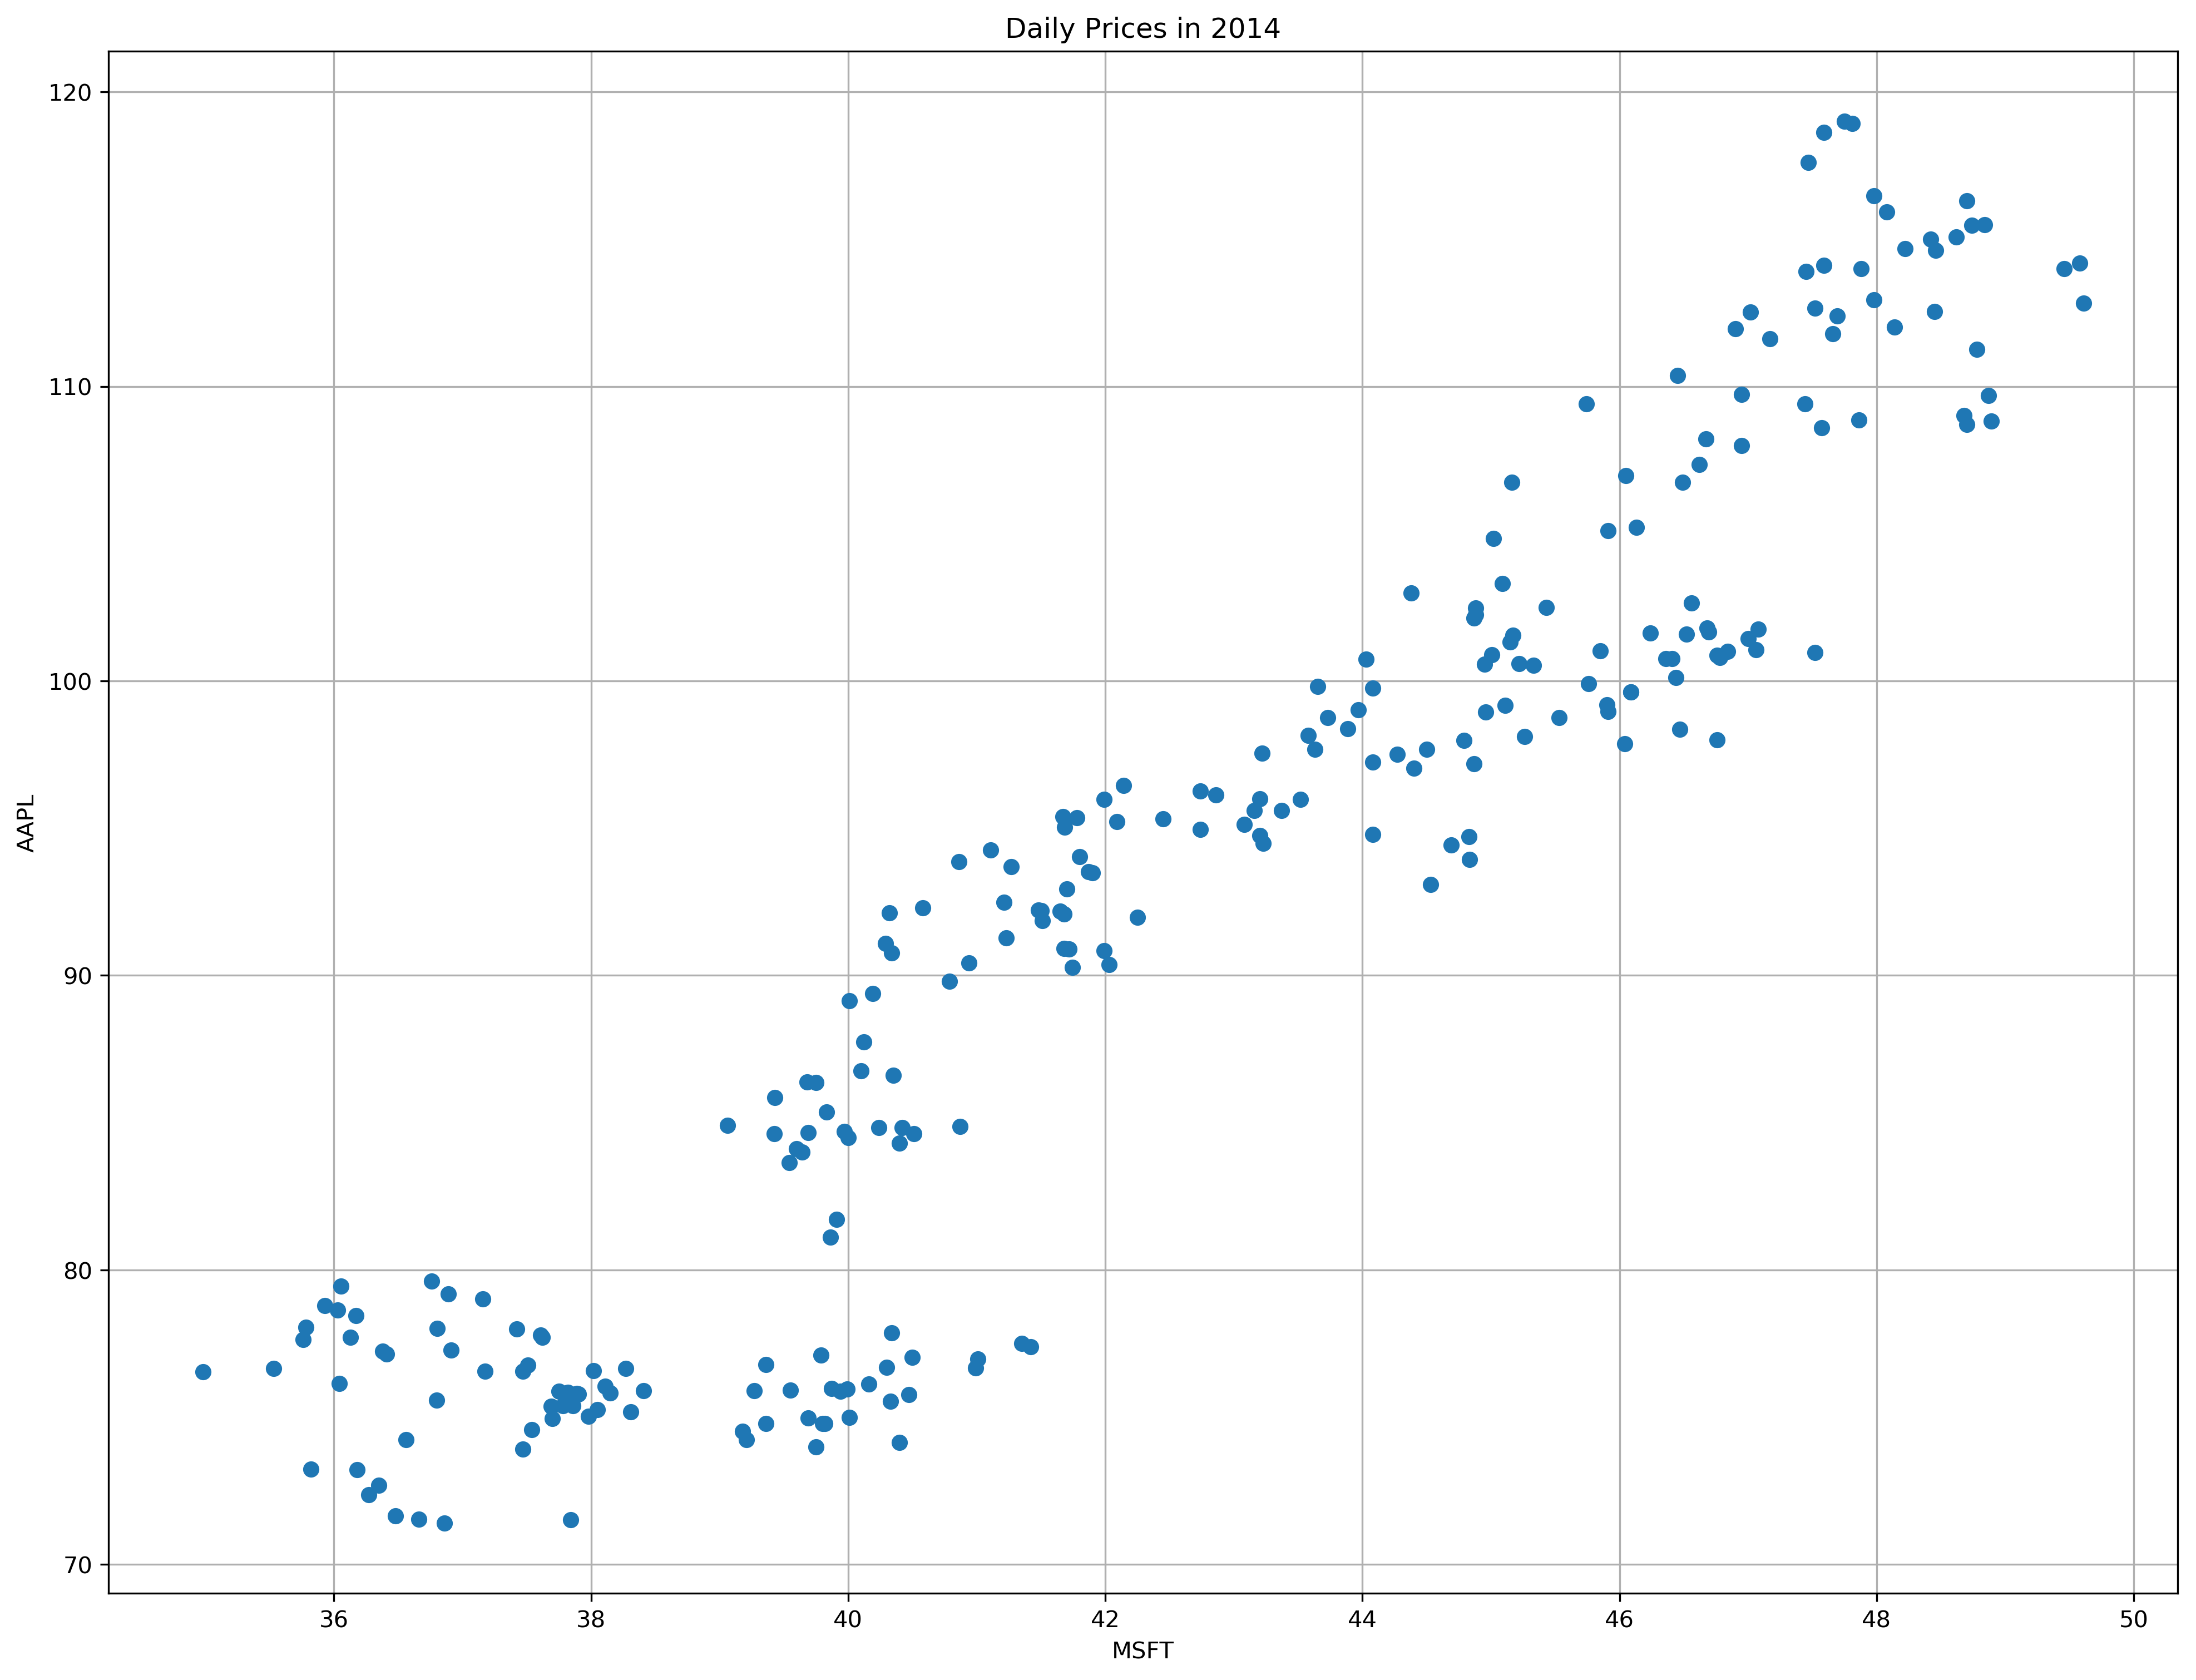

In [9]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

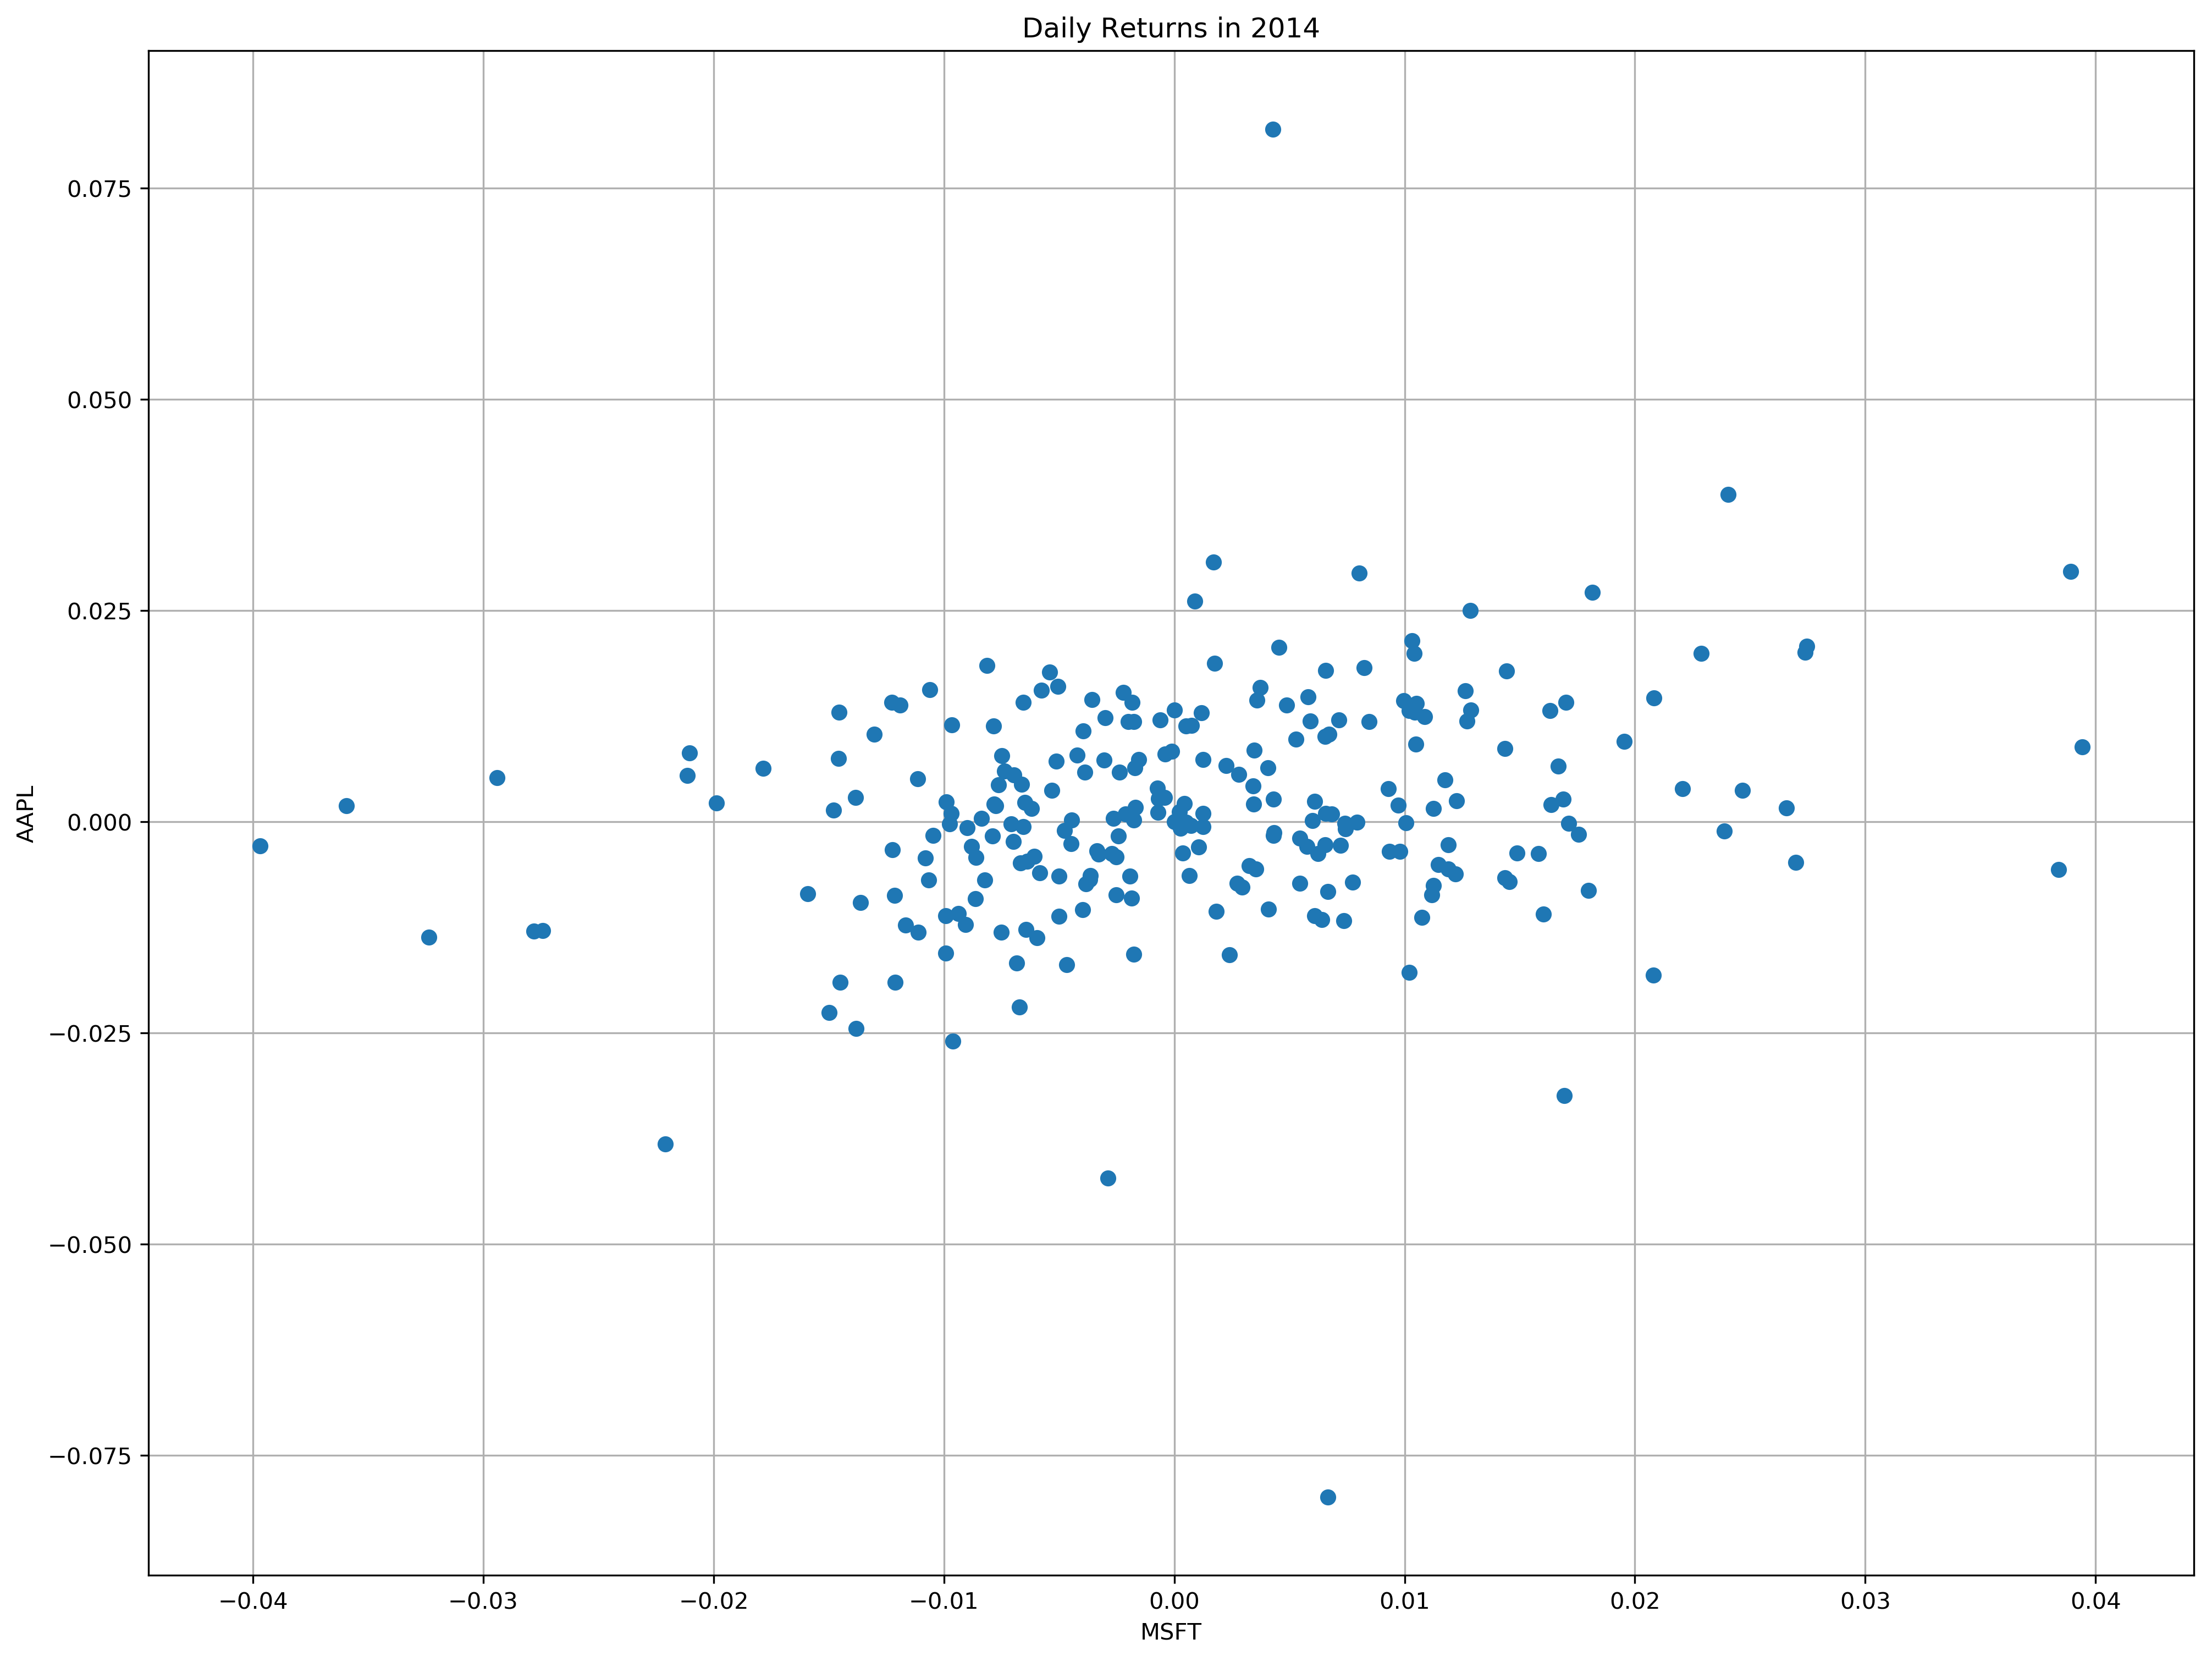

In [10]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

## 线形图

当我们想要跟踪 x 值变化时 y 值的变化，可以使用线形图。例如，当我们绘制股票的价格时，将其显示为线形图，而不是仅绘制数据点，这使得更容易随时间推移跟踪价格。

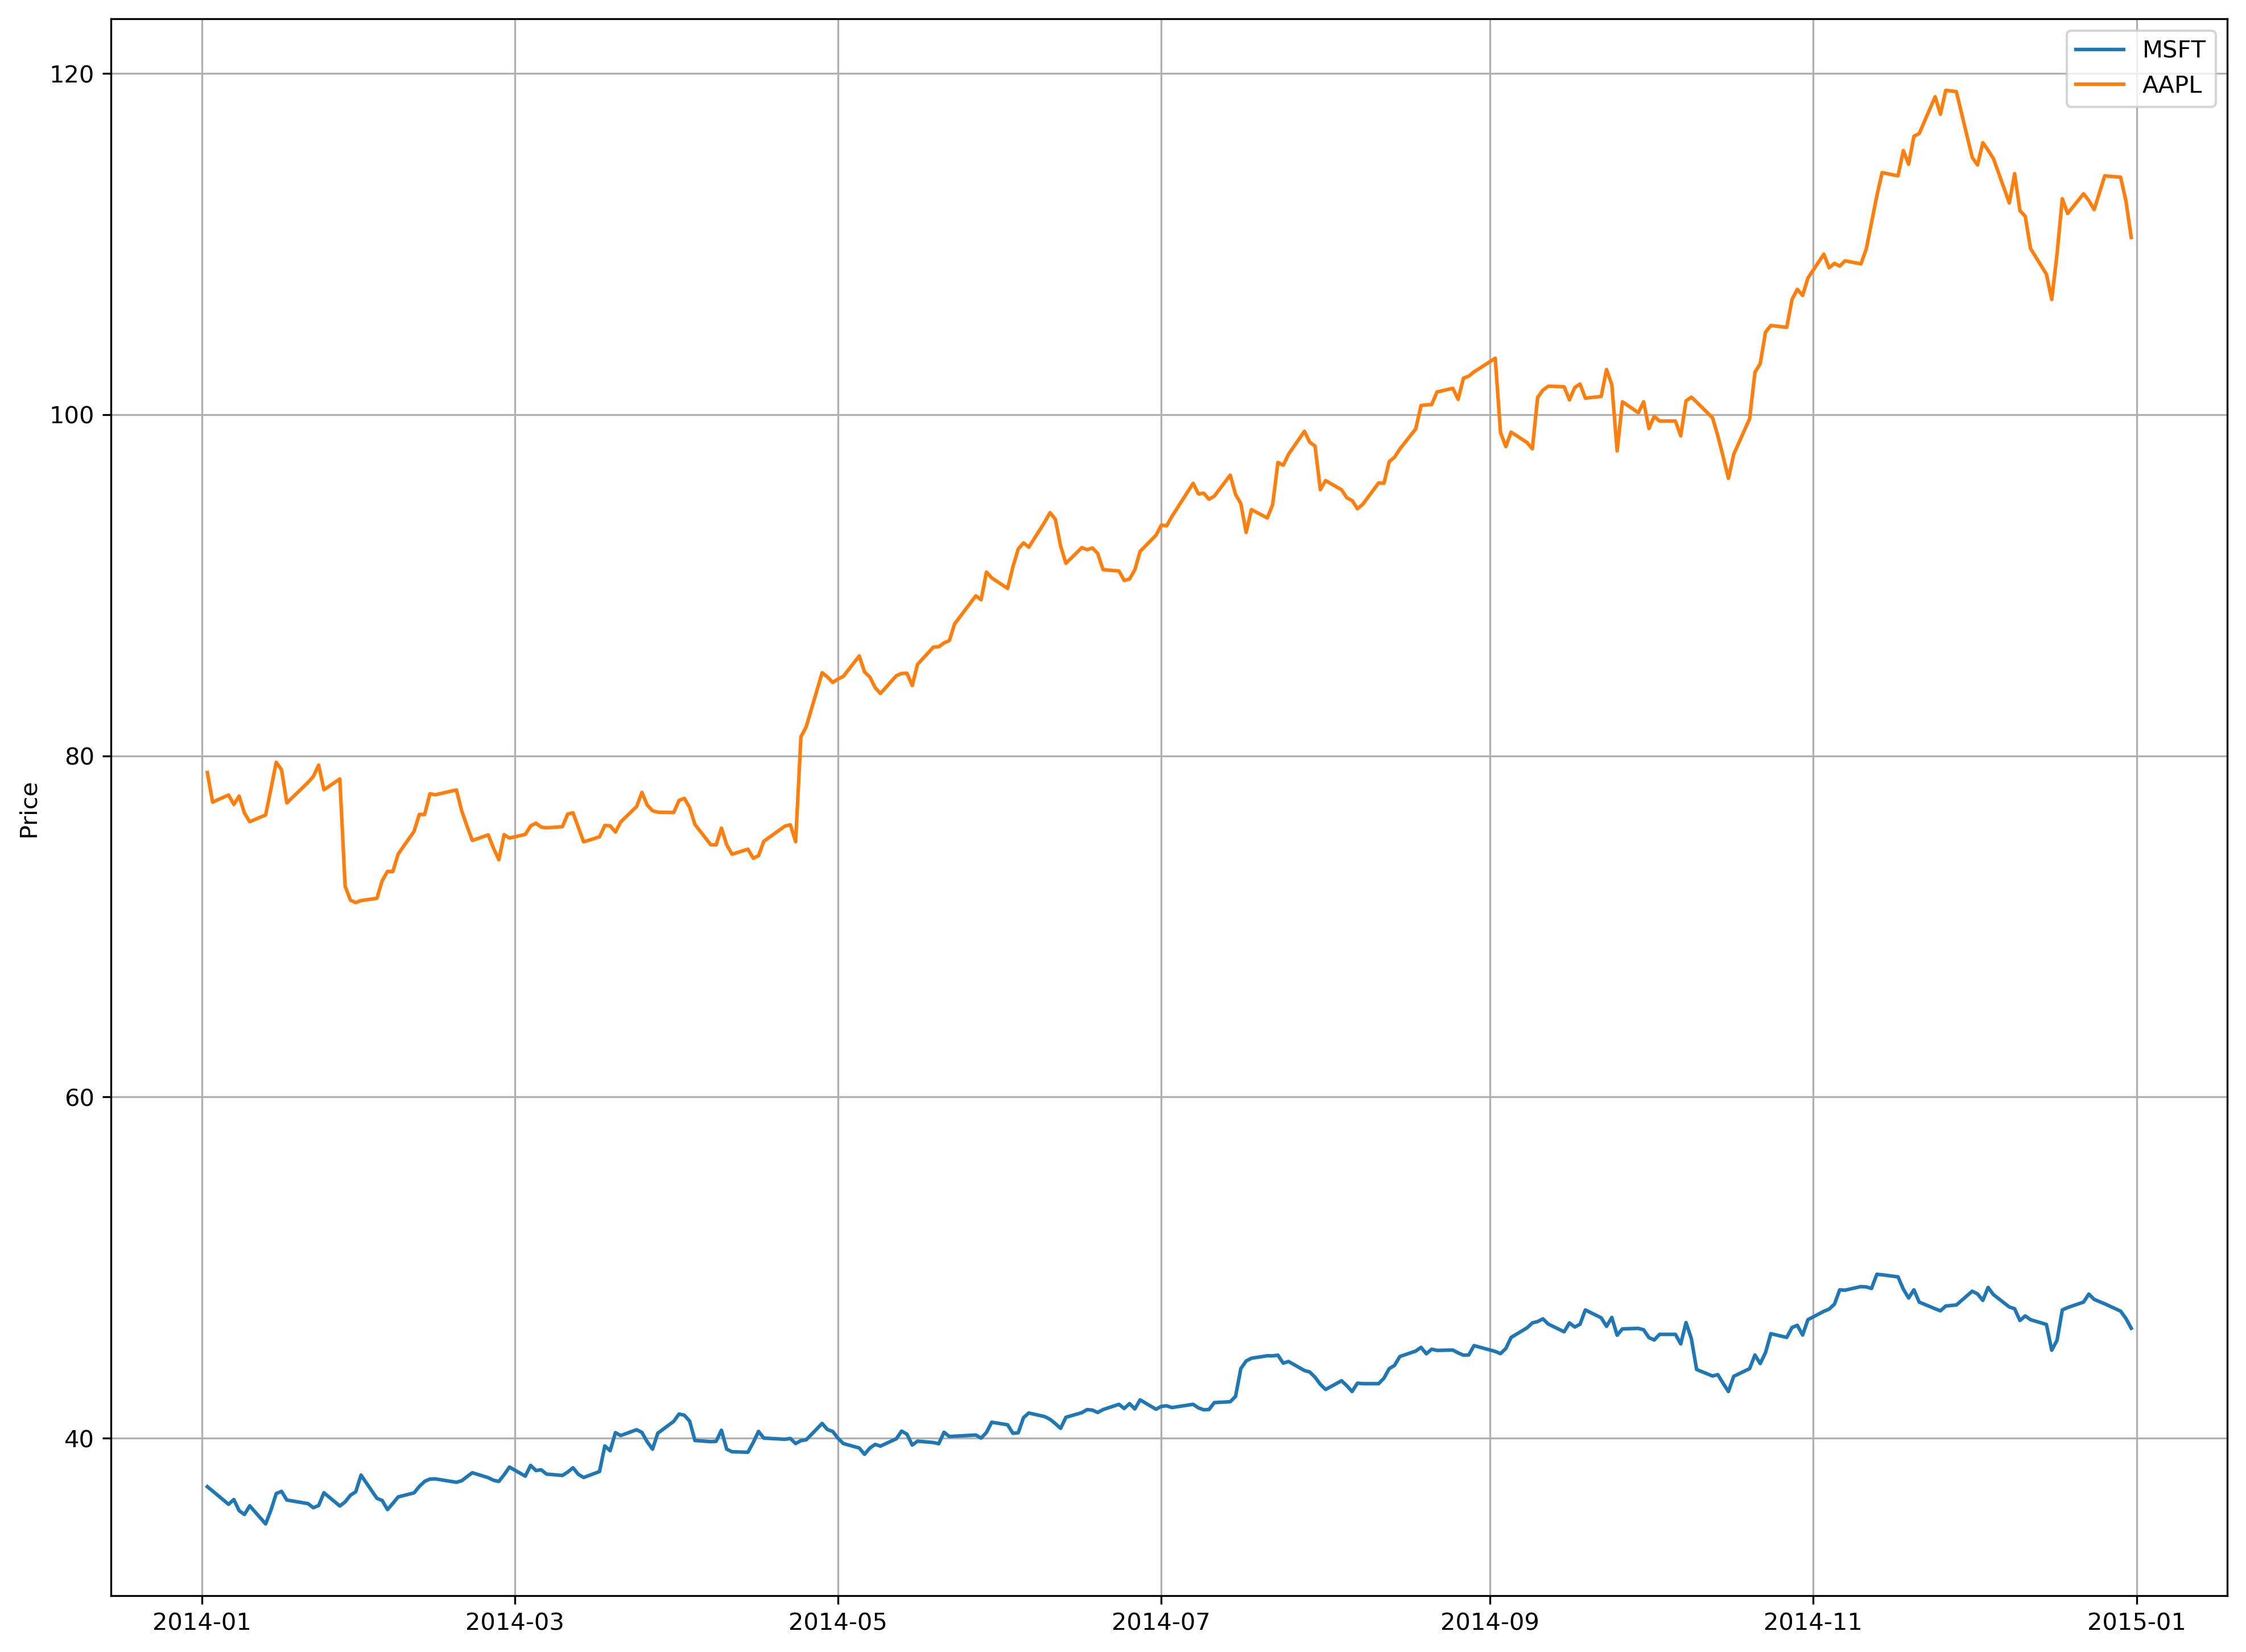

In [11]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

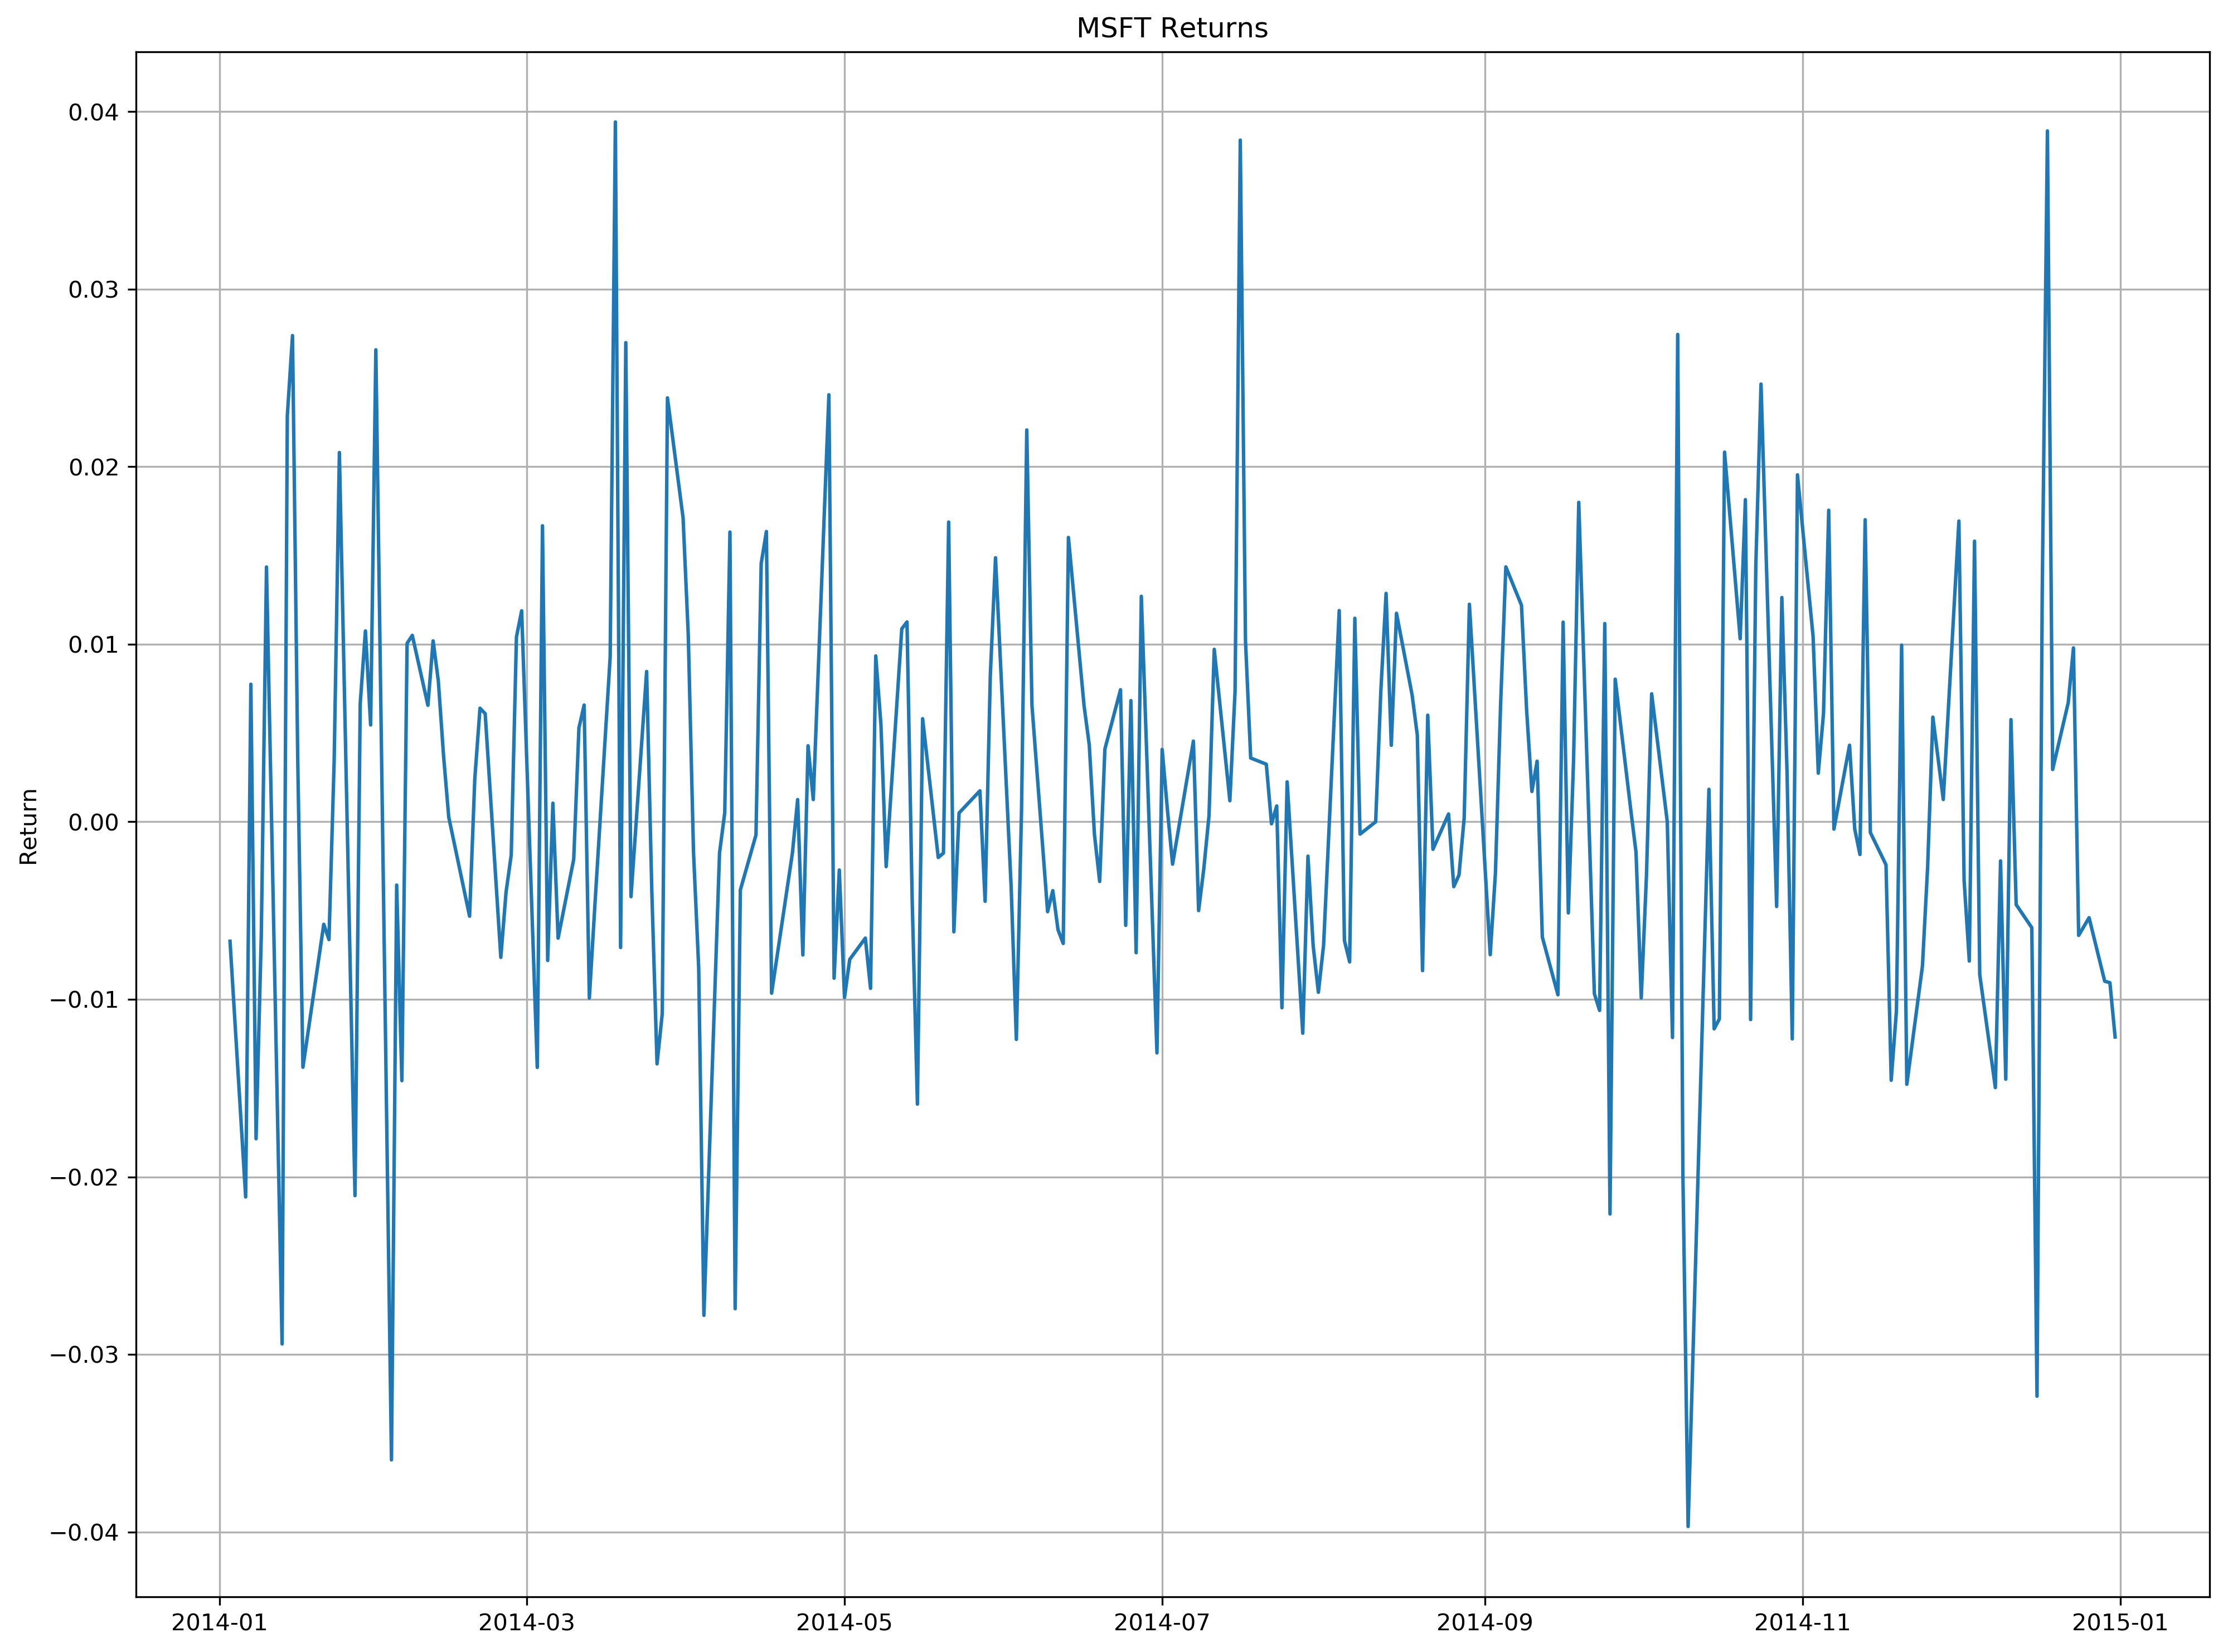

In [12]:
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');